# PROJECT TITLE : UNEMPLOYMENT DATA ANALYSIS
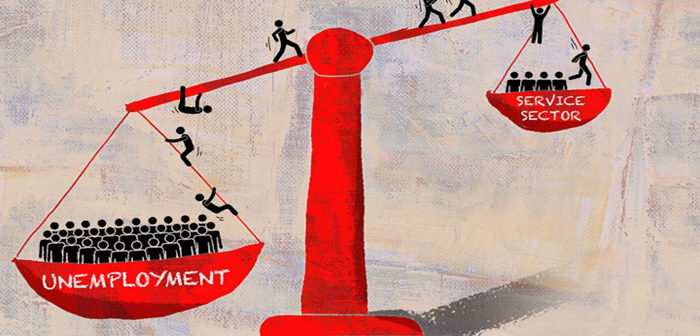

## Follow this step-by-step guide to work on your project.

### Step 1: Select a real-world dataset
Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
The data should be in CSV format, and should contain at least 3 columns and 150 rows
Download the dataset using the opendatasets Python library
Here's some sample code for downloading the US Elections Dataset:

import opendatasets as od
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset'
od.download('https://www.kaggle.com/tunguz/us-elections-dataset')
You can find a list of recommended datasets here: https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711

### Step 2: Perform data preparation & cleaning
Load the dataset into a data frame using Pandas
Explore the number of rows & columns, ranges of values etc.
Handle missing, incorrect and invalid data
Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)
### Step 3: Perform exploratory analysis & visualization
Compute the mean, sum, range and other interesting statistics for numeric columns
Explore distributions of numeric columns using histograms etc.
Explore relationship between columns using scatter plots, bar charts etc.
Make a note of interesting insights from the exploratory analysis
### Step 4: Ask & answer questions about the data
Ask at least 4 interesting questions about your dataset
Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does
### Step 5: Summarize your inferences & write a conclusion
Write a summary of what you've learned from the analysis
Include interesting insights and graphs from previous sections
Share ideas for future work on the same topic using other relevant datasets
Share links to resources you found useful during your analysis

In [1]:
import jovian 
import pandas as pd
import os

## 1. DOWNLOADING AND OPENING A DATASET

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/jayrav13/unemployment-by-county-us")

Skipping, found downloaded files in ".\unemployment-by-county-us" (use force=True to force download)


In [4]:
os.listdir('.\\unemployment-by-county-us')

['output.csv', 'result.json']

## 2. DATA PREPARATION AND CLEANING 

In [5]:
unemployment_df = pd.read_csv('.\\unemployment-by-county-us\\output.csv')

In [6]:
type(unemployment_df)

pandas.core.frame.DataFrame

In [7]:
unemployment_df.head(10)

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6
5,2015,February,Mississippi,Calhoun County,6.9
6,2015,February,Mississippi,Clarke County,7.9
7,2015,February,Mississippi,Jefferson County,14.3
8,2015,February,Mississippi,Madison County,4.5
9,2015,February,Mississippi,Sharkey County,11.1


>**This shows the top 10 rows and columns of our dataset.**

In [8]:
unemployment_df.shape

(885548, 5)

>**Our Datasets contains 885548 rows and 5 columns consisting of information regarding**

In [9]:
unemployment_df.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


>**The above chart gives us some statistical information about our dataset such as mean , and min max of years and rates and much more.**

In [10]:
unemployment_df.isnull().values

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [11]:
unemployment_df.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

>**Here are the headers of the columns of our Dataset**

In [12]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


>**.info() shows the type of data we have in various columns and rows.As we can see here, year is an integer type , and month , state and country are classified as objects and rate as float because of the leading decimal numbers**

## EXPLORATORY ANALYSIS AND VISUALIZATION

<AxesSubplot:xlabel='Year'>

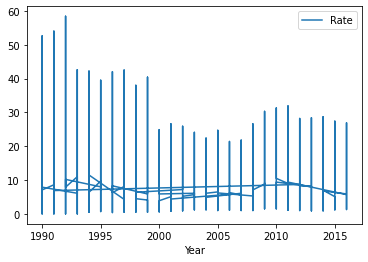

In [13]:
unemployment_df.plot('Year' , 'Rate')

>**Ques) What is the average unemployment rate in the US ?**

**--> mean() : It gives the arethematic mean of the given data.**

In [14]:
average_unemployment_rate = unemployment_df.Rate.mean()

In [15]:
average_unemployment_rate

6.175009711500733

**The average unemployment rate in the US is about 6.17%**

>**Ques) What are the total number of unique states in our dataset ?**

**--> nunique(): returns the total number of unique elements in a given series**

In [16]:
number_of_states = unemployment_df.State.nunique()

In [17]:
number_of_states

47

**The dataset consists data from 47 unique states**

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
sns.set(rc={"figure.figsize":(20, 10)})

<AxesSubplot:xlabel='Year', ylabel='Rate'>

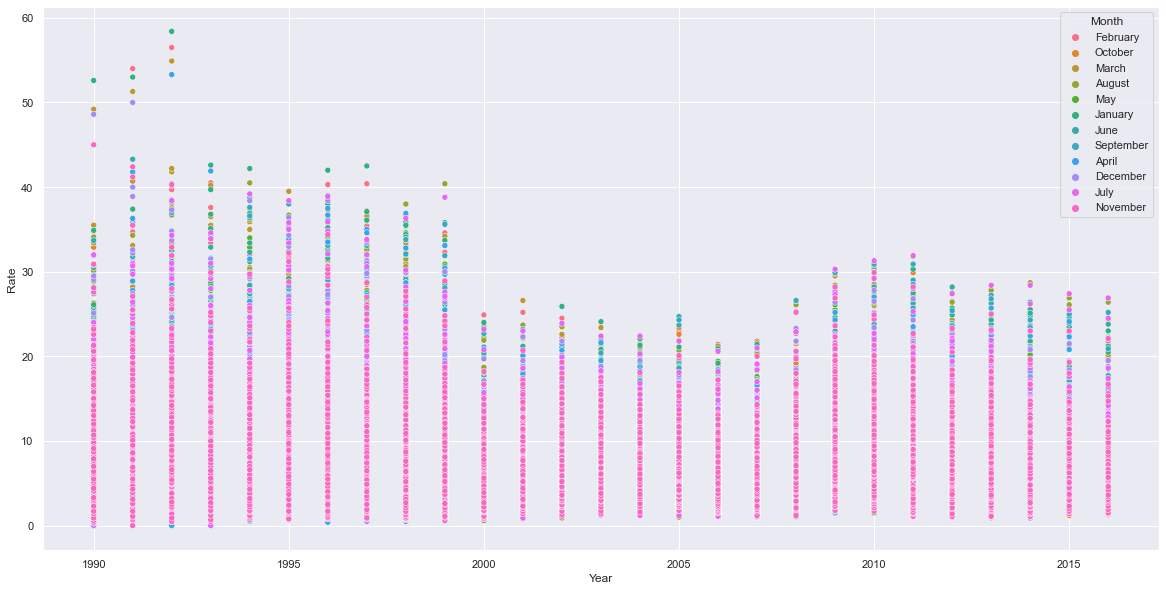

In [20]:
sns.scatterplot(x = unemployment_df.Year , y = unemployment_df.Rate, hue = unemployment_df.Month)

>**This scatterplot shows the unemployment rate during different years and months from 1990 to 2016**

<AxesSubplot:xlabel='Year', ylabel='Rate'>

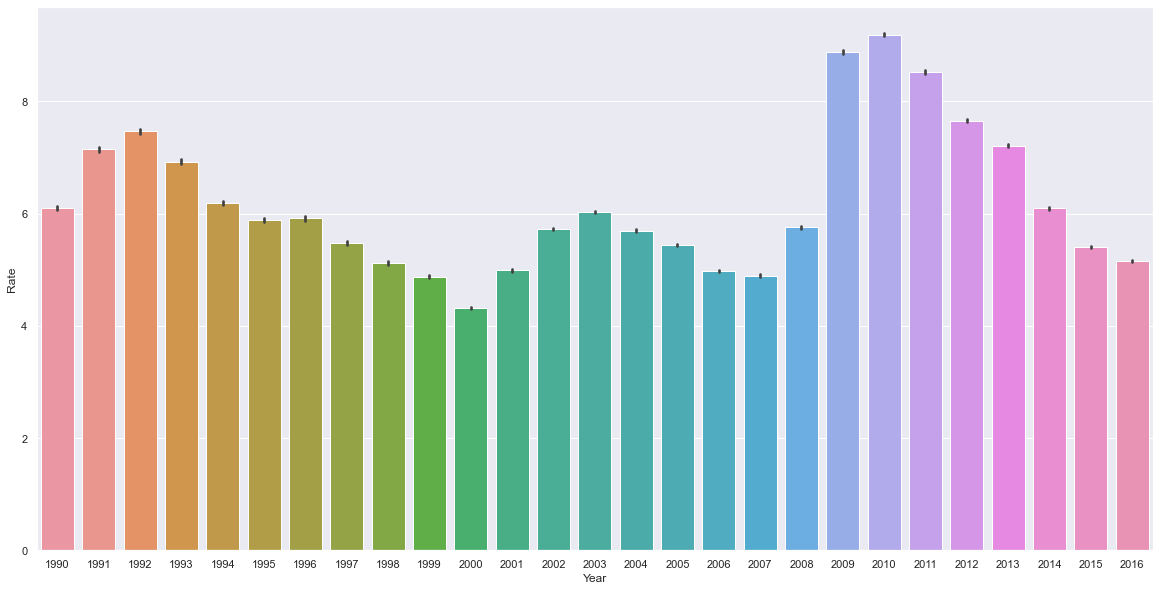

In [21]:
sns.barplot(x = unemployment_df.Year , y = unemployment_df.Rate)

>**The dataset contains about data from 47 different states. In the period from 1990 to 2-16, the average unemployment in the US has been around 6.17% , highest being arount the time 2009-2011**

## QUESTIONS AND ANSWERS

### **1. Create a DataFrame consisting of Countries And their exact employment Rate** 

In [22]:
exact_number_df = unemployment_df.pivot_table("Rate",index=['State'],aggfunc='mean')
exact_number_df

,Rate
State,
Alabama,7.723844
Arizona,9.274588
Arkansas,6.782210
California,9.045005
Colorado,5.358946
Connecticut,5.548534
Delaware,5.041049
Hawaii,5.730401
Idaho,6.319992


In [23]:
exact_number_df.describe()

,Rate
count,47.000000
mean,6.232931
std,1.400462
min,3.109903
25%,5.381348
50%,6.258425
75%,7.161100
max,9.274588


>**exact_df shows the data for each state in with their employment rate**

### **2. Which state has most data ?**

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


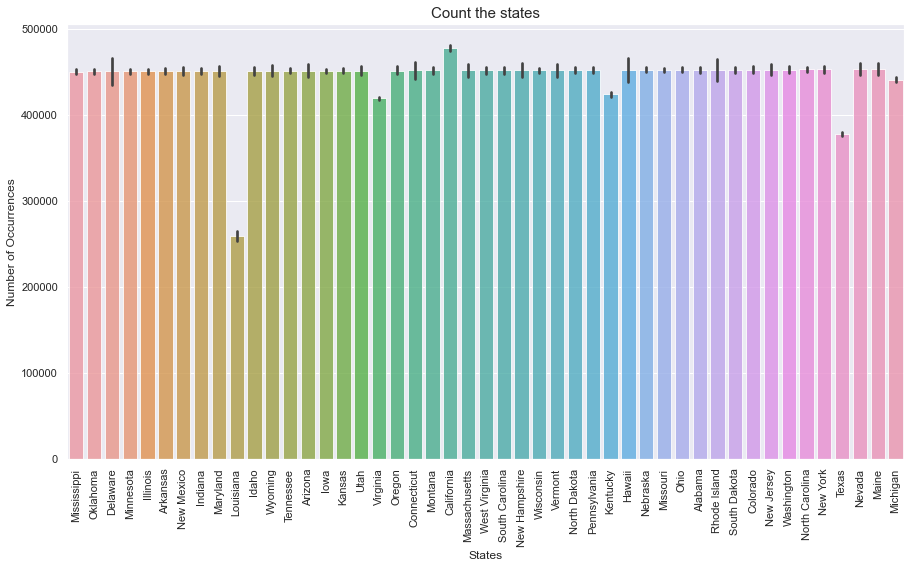

In [24]:
color = sns.color_palette()

plt.figure(figsize=(15,8))
sns.barplot( unemployment_df.State.values,  unemployment_df.State.index, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Count the states', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

>**As it can be seen in the graph, California has the maximum data ans Louisiana has the minimum data**

### **3. Plot a graph for mean of rate from state to state**

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


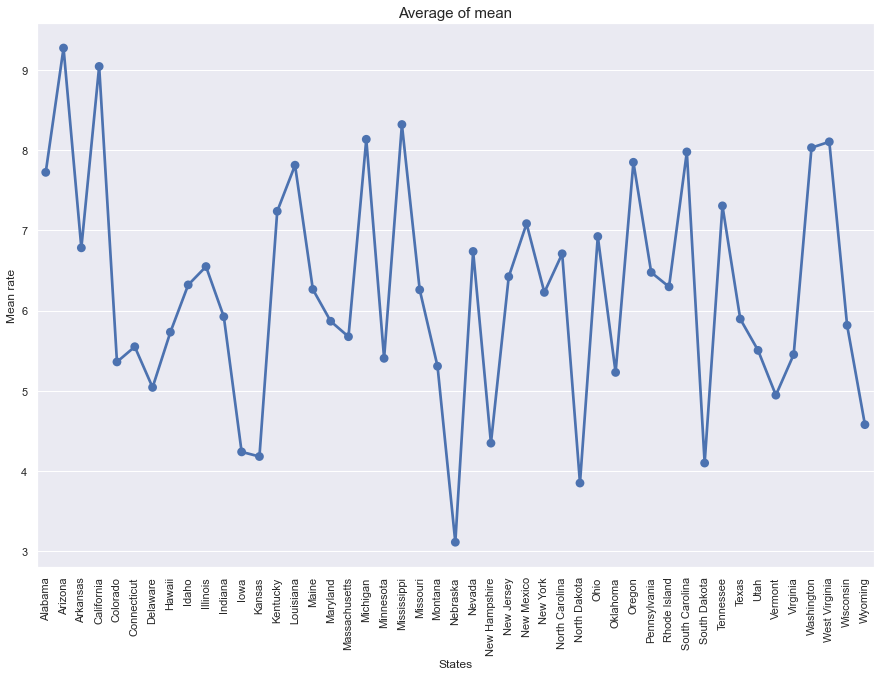

In [25]:
grouped_df = unemployment_df.groupby(["State"])["Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(15,10))
sns.pointplot(grouped_df['State'].values, grouped_df['Rate'].values, alpha=0.8)
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

>**The above graphs shows the mean rate of from state to state. As it can be seen in the graph, the maximum mean is of Arizona and minimum is from Nebraska**

### **4. Display Maximum 10 Unemployment Rate in the Given Data with month and state**

In [26]:
max_unemployment_df = unemployment_df.sort_values('Rate' , ascending = False).head(10)
max_unemployment_df

,Year,Month,State,County,Rate
351231,1992,January,Colorado,San Juan County,58.4
337760,1992,February,Colorado,San Juan County,56.5
342958,1992,March,Colorado,San Juan County,54.9
240742,1991,February,Texas,Starr County,54.0
359186,1992,April,Colorado,San Juan County,53.3
254113,1991,January,Texas,Starr County,53.0
286921,1990,January,Texas,Starr County,52.6
246078,1991,March,Texas,Starr County,51.3
264485,1991,December,Colorado,San Juan County,50.0
278458,1990,March,Texas,Starr County,49.2


>**These are the top 10 countires with minimum unemployment Rates**

### 5. What State has maximum occurance of Unemployment

In [27]:
Highest_occurance = unemployment_df.groupby('State')[['Rate']].count()
State_Highest = Highest_occurance.sort_values('Rate', ascending=False)
State_Highest.head(5)

,Rate
State,
Texas,57658
Virginia,39900
Missouri,37260
Kentucky,36360
Kansas,34020


>**Texas has the maximum occurance of unemployment**

### **6. Display Minimum 10 Unemployment Rate in the Given Data with month and state**

In [28]:
min_unemployment_df = unemployment_df.sort_values('Rate').head(10)
min_unemployment_df

,Year,Month,State,County,Rate
264736,1991,December,Texas,Loving County,0.0
270072,1991,November,Texas,Loving County,0.0
292152,1990,September,Texas,McMullen County,0.0
283943,1990,May,Texas,McMullen County,0.0
319216,1993,January,Texas,Loving County,0.0
240571,1991,February,Texas,Loving County,0.0
297526,1990,December,Texas,Loving County,0.0
253942,1991,January,Texas,Loving County,0.0
275416,1990,October,Texas,McMullen County,0.0
332623,1993,July,Texas,Loving County,0.0


>**These are the top 10 countires with minimum unemployment Rates**

## Inferences and Conclusion

From the data analysis we have done, the questions asked and answered, one can be wonder how these unemployment rate would have effected the ruling government and the people who were affected by this and its impact on the economy.
Also what measures were taken by the government to recover from the impact on the economy as well as to improve the unemployment rates.

Furthermore the analysis can be done about it's the country's recovery using the data about the literacy rate, rise in the number of companies.

It is agreeable that during the early years, the rate of unemployment was so high that it got to fifty plus (50+) in some months. Questions like what happened during that month and also in that state and county to make it attain such high value is of great importance.

## References and Future Work

**TODO** - Below are links referenced during the course of this project.

1. https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-6-exploratory-data-analysis-a-case-study
2. https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn
3. https://realpython.com/python-histograms/
4. https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/

In [ ]:
jovian.commit(project = 'unemployment-data')

<IPython.core.display.Javascript object>